In [31]:
#Importing Libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Reading CSV files
cereal_data = "API_AG.YLD.CREL.KG_DS2_en_csv_v2_5734359.csv"
population_data = "API_SP.POP.TOTL_DS2_en_csv_v2_4485025.csv"
bitcoin_tweets = 'Bitcoin_tweets.csv'

#Load cereal yield, population, and bitcoin tweets CSV data into dataframes
cereal_yield = pd.read_csv(cereal_data, skiprows=4)
pop_data = pd.read_csv(population_data, skiprows=4)
bitcoin_posts = pd.read_csv(bitcoin_tweets)

#Displaying the contents of the cereal_yield DataFrame to explore the structure of the data
print(cereal_yield)

#Extracting columns 'Country Code', '2019', and '2020' from cereal_yield.
cereal_recent = cereal_yield[['Country Code', '2019', '2020']]

#Reading a world map shapefile using GeoPandas for later visualization.
world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Merging the world map with the cereal yield data based on the 'Country Code' and 'iso_a3' columns.
global_cereal = world_map.merge(cereal_recent, left_on='iso_a3', right_on='Country Code')

global_cereal

<ipython-input-31-14c76569acd1>:14: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoin_posts = pd.read_csv(bitcoin_tweets)


                    Country Name Country Code                 Indicator Name  \
0                          Aruba          ABW  Cereal yield (kg per hectare)   
1    Africa Eastern and Southern          AFE  Cereal yield (kg per hectare)   
2                    Afghanistan          AFG  Cereal yield (kg per hectare)   
3     Africa Western and Central          AFW  Cereal yield (kg per hectare)   
4                         Angola          AGO  Cereal yield (kg per hectare)   
..                           ...          ...                            ...   
261                       Kosovo          XKX  Cereal yield (kg per hectare)   
262                  Yemen, Rep.          YEM  Cereal yield (kg per hectare)   
263                 South Africa          ZAF  Cereal yield (kg per hectare)   
264                       Zambia          ZMB  Cereal yield (kg per hectare)   
265                     Zimbabwe          ZWE  Cereal yield (kg per hectare)   

     Indicator Code  1960         1961 

<ipython-input-31-14c76569acd1>:23: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Code,2019,2020
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,3353.4,3665.7
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,1883.3,1698.4
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,4010.8,4095.4
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,8006.1,8145.3
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,1154.5,1288.6
...,...,...,...,...,...,...,...,...,...
164,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",MKD,3554.0,3664.2
165,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",SRB,6126.9,6559.4
166,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",MNE,3166.8,3260.0
167,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",TTO,1529.7,1520.3


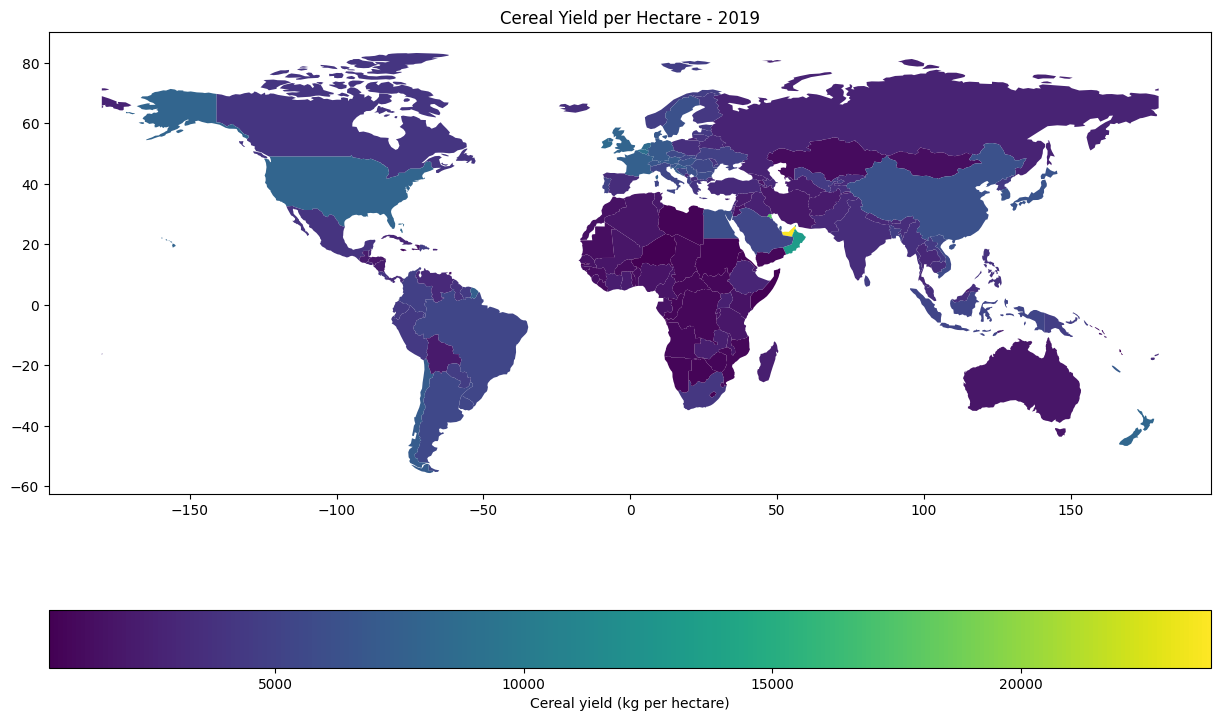

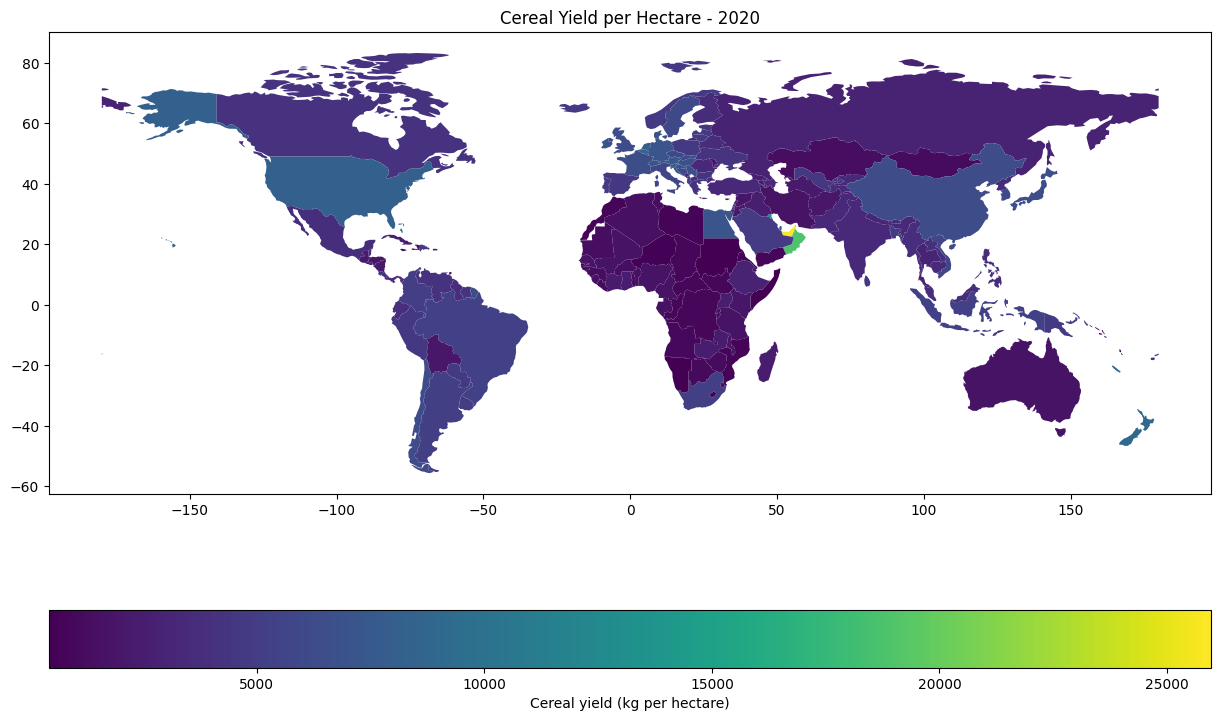

In [32]:
import matplotlib.pyplot as plt

# Plotting the choropleth map for 2019
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
global_cereal.plot(column='2019', ax=ax, legend=True,
        legend_kwds={'label': "Cereal yield (kg per hectare)", 'orientation': "horizontal"})
ax.set_title('Cereal Yield per Hectare - 2019')
plt.show()

# Plotting the choropleth map for 2020
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
global_cereal.plot(column='2020', ax=ax, legend=True,
        legend_kwds={'label': "Cereal yield (kg per hectare)", 'orientation': "horizontal"})
ax.set_title('Cereal Yield per Hectare - 2020')
plt.show()

In [33]:
'''This code segment is responsible for creating choropleth maps using Matplotlib and GeoPandas to visualize the global distribution of
cereal yield per hectare for the years 2019 and 2020.'''

'This code segment is responsible for creating choropleth maps using Matplotlib and GeoPandas to visualize the global distribution of \ncereal yield per hectare for the years 2019 and 2020.'

In [34]:
# Extracting a subset of population data for the year 2021, including 'Country Code' and '2021' columns
pop_2021 = pop_data[['Country Code', '2021']]

# Merging the population data with the geometrical data of the world map based on common columns 'iso_a3' and 'Country Code'
world_pop = world_map.merge(pop_2021, left_on='iso_a3', right_on='Country Code')

# Displaying the first few rows of the merged GeoDataFrame to inspect the structure of the data
world_pop.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,Country Code,2021
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",FJI,902899.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",TZA,61498438.0
2,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",CAN,38246108.0
3,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",USA,331893745.0
4,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",KAZ,19002586.0


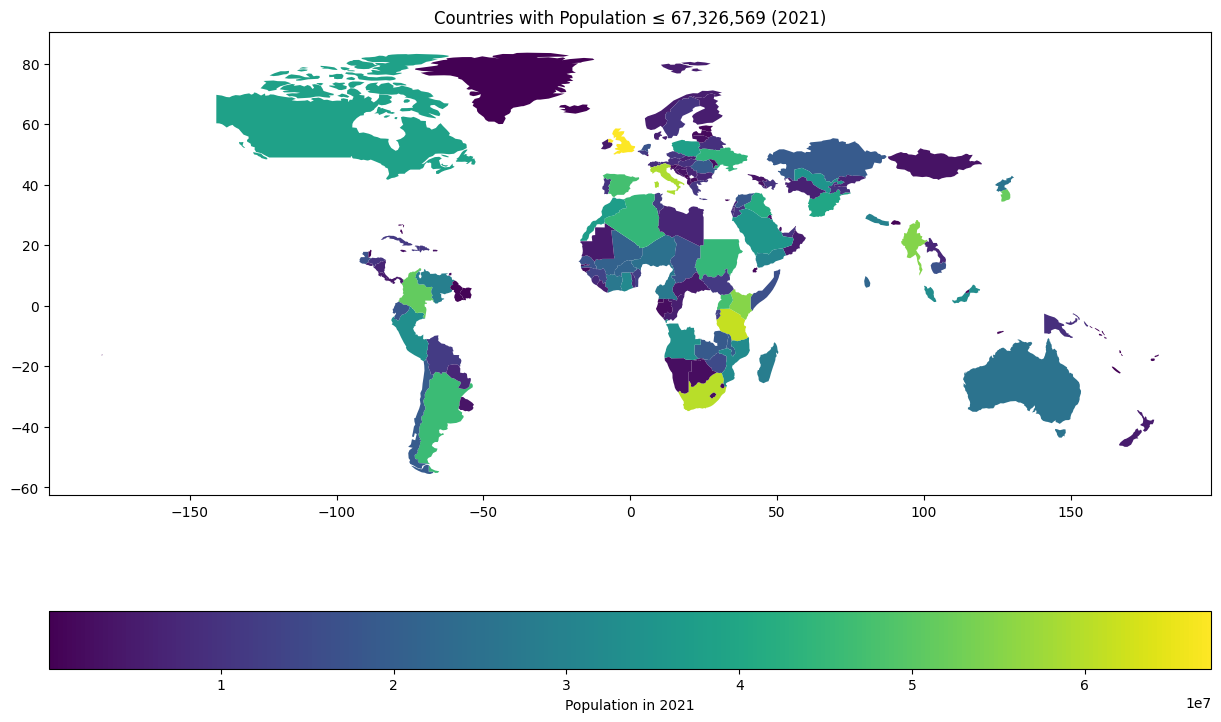

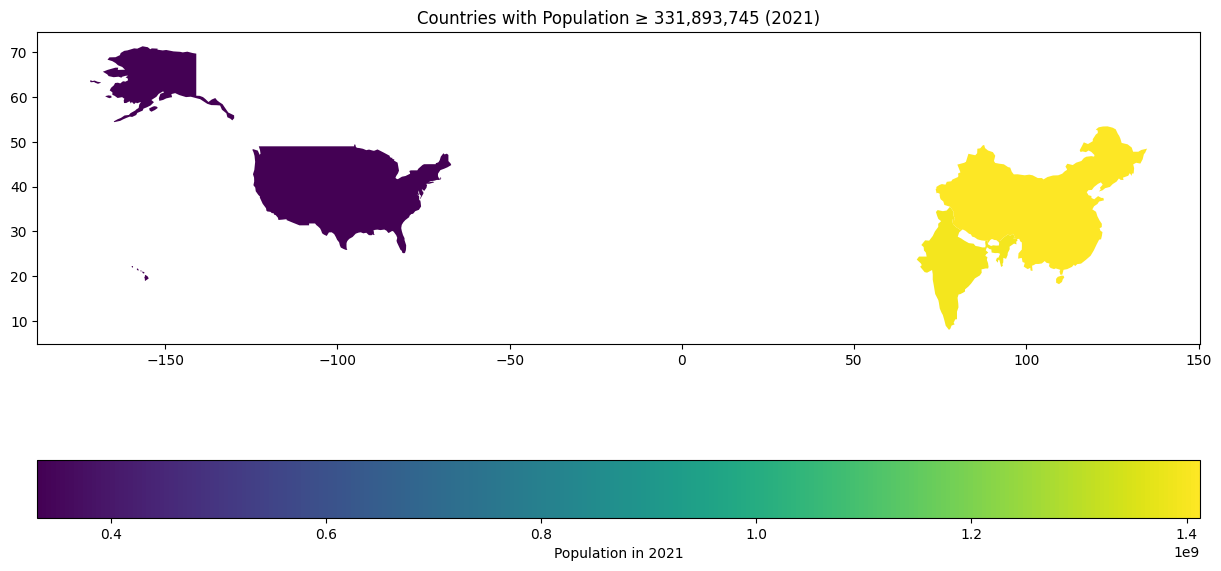

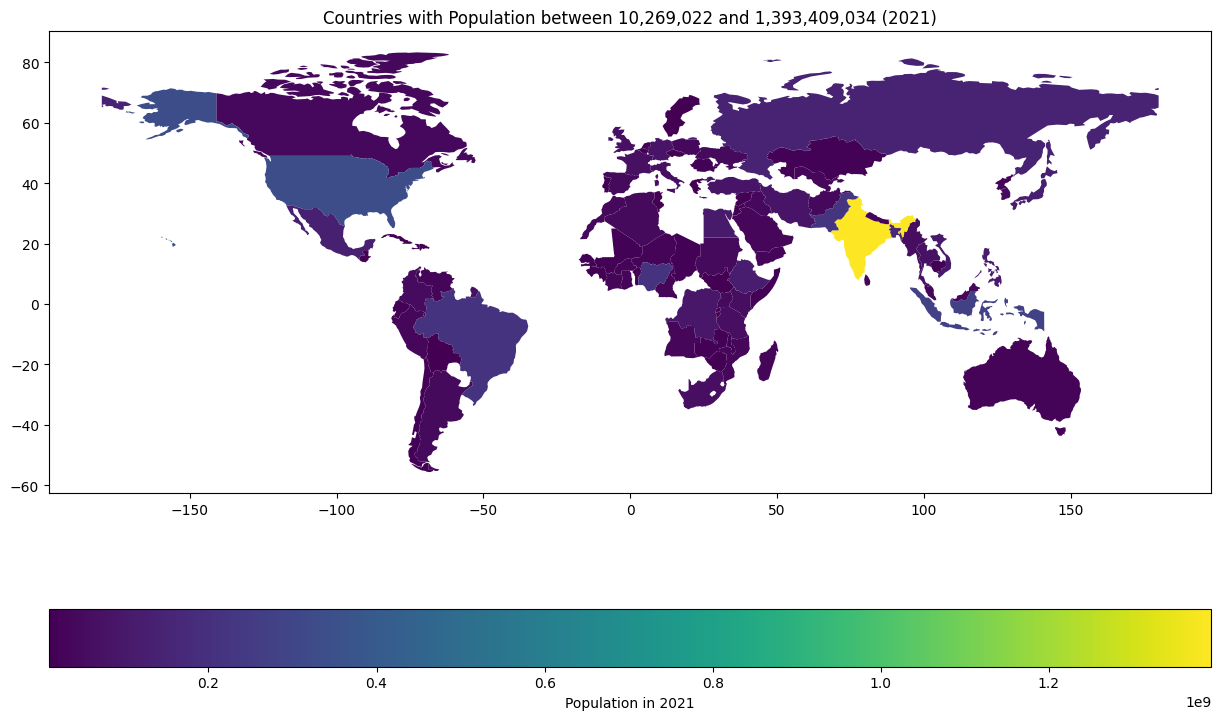

In [35]:
# Analyzing and Visualizing Countries Based on Population Ranges in 2021
# 1.2.1: Countries with population ≤ 67,326,569
min_pop_1 = 0
max_pop_1 = 67326569

# Filtering countries with population within the specified range
pop_low = world_pop[(world_pop['2021'] >= min_pop_1) & (world_pop['2021'] <= max_pop_1)]

# Creating a choropleth map for countries with low population
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_low.plot(column='2021', ax=ax, legend=True,
         legend_kwds={'label': "Population in 2021",
                      'orientation': "horizontal"})
ax.set_title('Countries with Population ≤ 67,326,569 (2021)')
plt.show()

# 1.2.2: Countries with population ≥ 331,893,745
min_pop_2 = 331893745
max_pop_2 = world_pop['2021'].max()

# Filtering countries with population within the specified range
pop_high = world_pop[(world_pop['2021'] >= min_pop_2) & (world_pop['2021'] <= max_pop_2)]

# Creating a choropleth map for countries with high population
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_high.plot(column='2021', ax=ax, legend=True,
         legend_kwds={'label': "Population in 2021",
                      'orientation': "horizontal"})
ax.set_title('Countries with Population ≥ 331,893,745 (2021)')
plt.show()

# 1.2.3: Countries with population between 10,269,022 and 1,393,409,034
min_pop_3 = 10269022
max_pop_3 = 1393409034

# Filtering countries with population within the specified range
pop_mid = world_pop[(world_pop['2021'] >= min_pop_3) & (world_pop['2021'] <= max_pop_3)]

# Creating a choropleth map for countries with moderate population
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
pop_mid.plot(column='2021', ax=ax, legend=True,
         legend_kwds={'label': "Population in 2021",
                      'orientation': "horizontal"})
ax.set_title('Countries with Population between 10,269,022 and 1,393,409,034 (2021)')
plt.show()

In [36]:
'''
Creates a subplot for visualizing countries with a population less than or equal to 67,326,569 in the year 2021.
The choropleth map uses color intensity to represent the population of each country.
Displays the legend and sets the title for better understanding.
'''

'\nCreates a subplot for visualizing countries with a population less than or equal to 67,326,569 in the year 2021.\nThe choropleth map uses color intensity to represent the population of each country.\nDisplays the legend and sets the title for better understanding.\n'

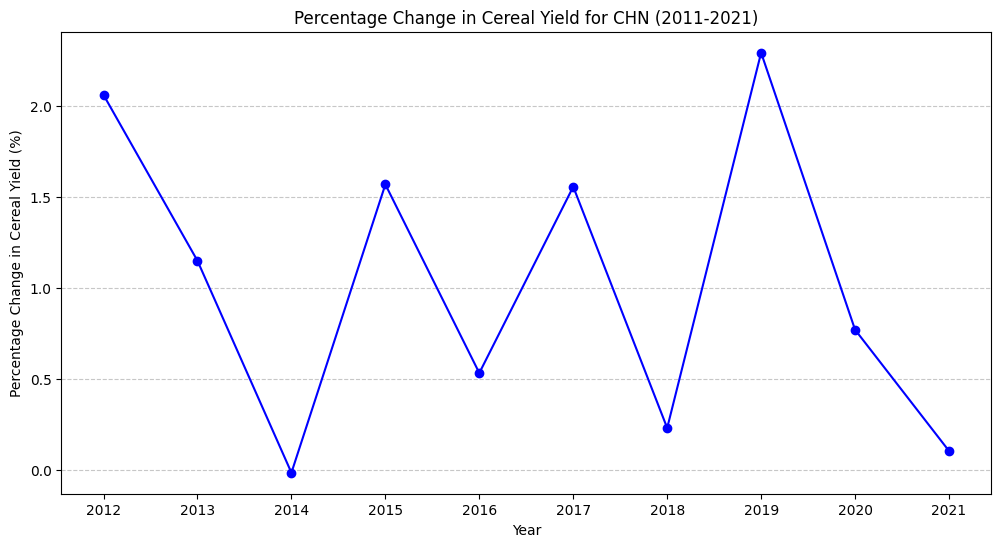

In [50]:
# Analyzing Percentage Change in Cereal Yield for the Country with the Highest Population in 2021
# Sorting countries by population in 2021 and selecting the top one
top_pop_country = world_pop.sort_values('2021', ascending=False).iloc[0]

# Extracting the country code of the top-populated country
country_code = top_pop_country['Country Code']

# Extracting cereal yield data for the top-populated country
top_cereal = cereal_yield[cereal_yield['Country Code'] == country_code]

# Extracting cereal yield values for the years 2011 and 2021
cy_2011 = top_cereal.iat[0, top_cereal.columns.get_loc('2011')]
cy_2021 = top_cereal.iat[0, top_cereal.columns.get_loc('2021')]

# Calculating the percentage change in cereal yield from 2011 to 2021
pct_change = top_cereal[['2011', '2021']].pct_change(axis=1)['2021'].values[0] * 100

# Extracting cereal yield values for the specified years
years = ['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']
cereal_values = top_cereal[years]

# Calculating the yearly percentage change in cereal yield
pct_change_yearly = cereal_values.pct_change(axis=1) * 100

# Plotting the percentage change in cereal yield over the years
plt.figure(figsize=(12, 6))
plt.plot(years, pct_change_yearly.values.flatten(), marker='o', color='blue', linestyle='-')
plt.xlabel('Year')
plt.ylabel('Percentage Change in Cereal Yield (%)')
plt.title(f'Percentage Change in Cereal Yield for {country_code} (2011-2021)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [38]:
'''
This code segment focuses on analyzing and visualizing the cereal yield data for the country with the highest population in 2021.
It calculates the overall percentage change as well as the yearly percentage changes in cereal yield,
providing insights into the agricultural trends for this highly populated country over the specified time period.
The resulting plot helps in understanding how cereal yield has evolved annually for the selected country.
'''

'\nThis code segment focuses on analyzing and visualizing the cereal yield data for the country with the highest population in 2021.\nIt calculates the overall percentage change as well as the yearly percentage changes in cereal yield,\nproviding insights into the agricultural trends for this highly populated country over the specified time period. \nThe resulting plot helps in understanding how cereal yield has evolved annually for the selected country.\n'

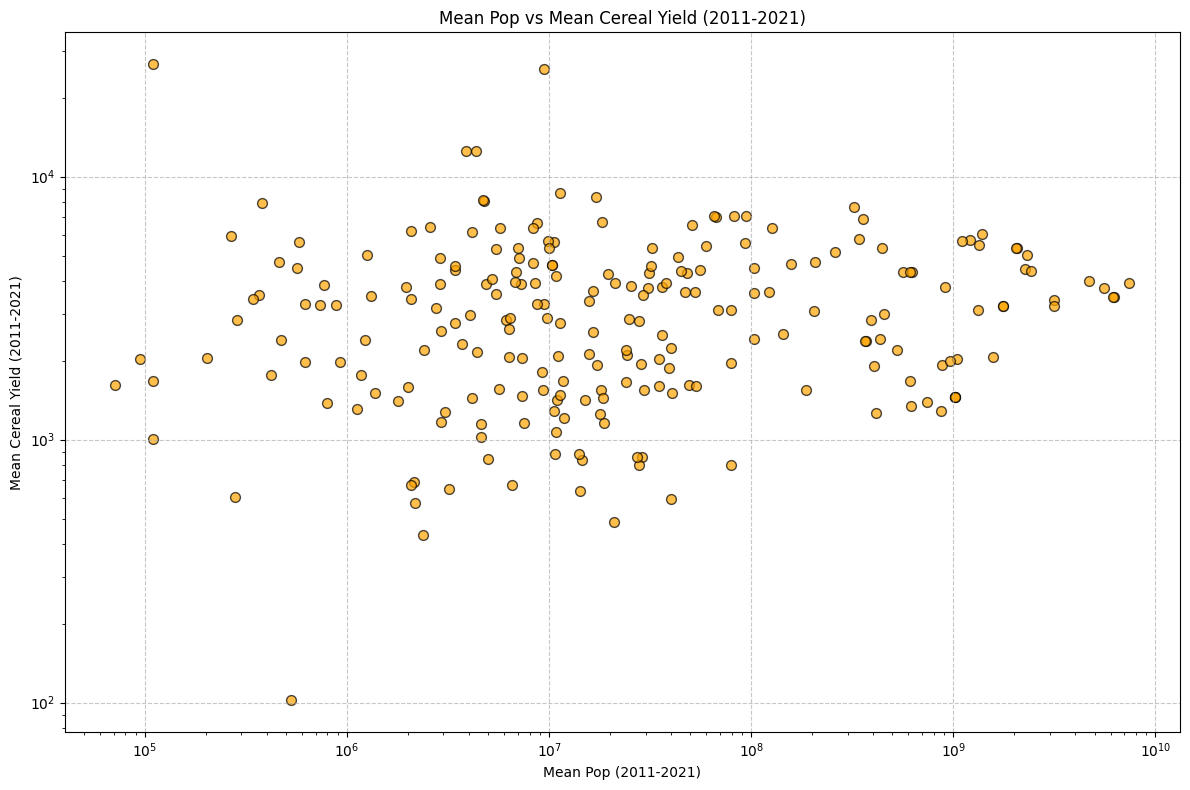

In [51]:
# Generating a Scatter Plot of Mean Population vs Mean Cereal Yield (2011-2021) for Multiple Countries
import numpy as np
import matplotlib.pyplot as plt

# Calculating the mean population for each country across the specified years
avg_pop = pop_data.filter(items=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']).mean(axis=1)

# Calculating the mean cereal yield for each country across the specified years
avg_cereal = cereal_yield.filter(items=['2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021']).mean(axis=1)

# Creating a list to store data points for each country
data_points = []

# Iterating through each country and its corresponding mean population and mean cereal yield
for country, pop, yield_ in zip(pop_data['Country Name'], avg_pop, avg_cereal):
    data = {
        'Country Name': country,
        'Mean Population': pop,
        'Mean Cereal Yield': yield_
    }
    data_points.append(data)

# Creating a scatter plot for each country, with log scale on the x-axis
plt.figure(figsize=(12, 8))
for point in data_points:
    plt.scatter(
        point['Mean Population'],
        point['Mean Cereal Yield'],
        alpha=0.7,
        c='orange',
        edgecolors='black',
        s=50,
        marker='o',
        label=point['Country Name']
    )

# Setting plot title and axis labels
plt.title('Mean Pop vs Mean Cereal Yield (2011-2021)')
plt.xlabel('Mean Pop (2011-2021)')
plt.ylabel('Mean Cereal Yield (2011-2021)')

# Applying log scale to the x-axis for better visualization
plt.xscale('log')
plt.yscale('log')

# Adding grid lines and adjusting layout for better presentation
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Displaying the plot
plt.show()

In [40]:
'''
This code segment generates a scatter plot to visualize the relationship between the mean population and mean cereal yield for various countries from 2011 to 2021.
The logarithmic scaling of the x-axis accommodates a wide range of population values.
Each point on the plot represents a country, and the plot provides a quick overview of the relationship between these two variables across multiple countries.
The labels and colors help in identifying individual countries in the scatter plot.
'''

'\nThis code segment generates a scatter plot to visualize the relationship between the mean population and mean cereal yield for various countries from 2011 to 2021. \nThe logarithmic scaling of the x-axis accommodates a wide range of population values. \nEach point on the plot represents a country, and the plot provides a quick overview of the relationship between these two variables across multiple countries. \nThe labels and colors help in identifying individual countries in the scatter plot.\n'

In [41]:
bitcoin_tweets

'Bitcoin_tweets.csv'

In [42]:
from geopy.geocoders import Nominatim
from textblob import TextBlob
import pandas as pd
import random

In [43]:
#Reading the csv file
bitcoin_tweets = pd.read_csv('Bitcoin_tweets.csv')

<ipython-input-43-edd88348bc8a>:2: DtypeWarning: Columns (5,6,7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  bitcoin_tweets = pd.read_csv('Bitcoin_tweets.csv')


In [44]:
import re
# Randomly sampling 500 tweets from the 'bitcoin_tweets' DataFrame
sampled_tweets = bitcoin_tweets.sample(n=500)

sampled_tweets = sampled_tweets.dropna(subset=['text'])

# Creating a new column 'clean_tweets' by applying text cleaning operations to the 'text' column
sampled_tweets['clean_tweets'] = sampled_tweets['text'].apply(lambda text:
    re.sub(r'http\S+', '', text)    # Remove hyperlinks
    .strip()                        # Remove leading and trailing whitespaces
    .lower()                        # Convert text to lowercase
    .replace('[^\w\s]', '')         # Remove non-alphanumeric characters
    .replace('\n', ' ')             # Replace newline characters with space
    .replace('\r', ' ')             # Replace carriage return characters with space
    .replace('\t', ' ')             # Replace tab characters with space
    .replace('\s+', ' ')            # Replace multiple whitespaces with a single space

)

sampled_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweets
374770,Sagar Panta,NaN,NaN,2021-01-04 16:46:47,2725.0,2205.0,1304.0,False,2021-07-24 17:49:01,@xircusNFT @xircusnft\n is creating an #NFTmar...,"['NFTmarketplace', 'xircusnft', 'nft', 'BSC', ...",Twitter Web App,False,@xircusnft @xircusnft is creating an #nftmark...
85968,BitcoinTracker,NaN,Tracking Bitcoin Prices and Moving Averages wi...,2021-02-17 21:05:57,313.0,7.0,13.0,False,2021-04-22 14:17:36,"$BTCUSD\nCurrent Bitcoin Price: $54,637\nDay H...","['Bitcoin', 'RealMoney', 'BTC', 'Cypto']",BitCoinTrackerBTC,False,"$btcusd current bitcoin price: $54,637 day hig..."
162619,CBo,NaN,Crypto Trading,2021-05-26 07:09:39,21.0,20,1099,False,2021-06-22 20:19:52,SafeBLAST is probably the only crypto that did...,"['safemoon', 'safemars', 'doge', 'dogearmy', '...",Twitter Web App,False,safeblast is probably the only crypto that did...
474227,WhaleTrades 🐳,NaN,Whale-Watch-Bot Keeping You Connected To Crypt...,2018-02-28 10:32:22,105623.0,0.0,372.0,False,2021-07-21 09:04:09,"📈💴$1,827,063 #bitcoin LONGED @$30907.1 [21/07/...",['bitcoin'],Bitmex High Trades,False,"📈💴$1,827,063 #bitcoin longed @$30907.1 [21/07/..."
259532,eBankX,NaN,NaN,2020-03-25 05:48:31,9.0,0.0,4.0,False,2021-07-05 18:30:27,"If you are wondering how bitcoin works, here i...","['EBX', 'eBankX', 'cryptocurrencyexchange', 'b...",Buffer,False,"if you are wondering how bitcoin works, here i..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82139,MoonMan,NaN,🚀🚀🚀🚀 Crypto and Stock Enthusiast $KIN $TRX **N...,2021-03-22 03:16:08,112.0,39.0,206.0,False,2021-04-23 05:33:19,Omg! They are so cute when they are babies @kr...,"['Kin', 'NFTs', 'DeFi', 'btc', 'bitcoin', 'sol...",Twitter for iPhone,False,omg! they are so cute when they are babies @kr...
503437,thereal1,NaN,#bitcoin,2021-06-22 14:58:00,4.0,51.0,126.0,False,2021-07-20 08:03:29,"I'm hunter, so i hate bears! #btc #bitcoin #cr...","['btc', 'bitcoin', 'cryptocurrency']",Twitter for Android,False,"i'm hunter, so i hate bears! #btc #bitcoin #cr..."
196531,Pebtis,Bogor,Pekerjaan seberat apapun akan terasa ringan bi...,2011-11-30 17:37:43,157.0,1057,883,False,2021-06-22 04:45:27,"I Think, this is very strong project Thanks fo...","['cryptocurrency', 'bitcoin', 'btc', 'crypto',...",Twitter Web App,False,"i think, this is very strong project thanks fo..."
420348,silver Austin,United States 🇺🇸,CRYPTO TRADING & BITCOIN MINING⛏ Invest $5k an...,2021-07-10 17:54:57,6.0,57.0,37.0,False,2021-07-22 20:18:08,@Cointelegraph Just a few months of #bitcoin p...,['bitcoin'],Twitter for Android,False,@cointelegraph just a few months of #bitcoin p...


In [45]:

# Initializing a geolocator using Nominatim for geocoding
geolocator = Nominatim(user_agent="geoencoding")
# Initializing empty lists to store geocoded locations and sentiment analysis results
tweet_locs = []
tweet_sents = []
# Iterating over each row in the 'sampled_tweets' DataFrame
for index, row in sampled_tweets.iterrows():
  # Extracting user location and cleaned text from each row
    loc = row['user_location']
    cleaned_text = row['clean_tweets']

    # Geocode location
    if pd.notna(loc) and loc.strip():
        try:
          # Attempting to geocode the user location
            geo = geolocator.geocode(loc)
            if geo:
              # If geocoding is successful, appending latitude and longitude to 'tweet_locs'
                tweet_locs.append((geo.latitude, geo.longitude))
            else:
               # If geocoding is unsuccessful, appending None to 'tweet_locs'
                tweet_locs.append(None)
        except:
          # Handling exceptions and appending None to 'tweet_locs' in case of errors
            tweet_locs.append(None)
    else:
      # Appending None to 'tweet_locs' if user location is missing or empty
        tweet_locs.append(None)

# Performing sentiment analysis using TextBlob

    analysis = TextBlob(cleaned_text)
    tweet_sents.append(analysis.sentiment)
# Creating new columns in 'sampled_tweets' for 'coordinates' and 'sentiment'

sampled_tweets['coordinates'] = tweet_locs
sampled_tweets['sentiment'] = tweet_sents

# Displaying the updated 'sampled_tweets' DataFrame with geocoded locations and sentiment analysis results

sampled_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_tweets,coordinates,sentiment
374770,Sagar Panta,NaN,NaN,2021-01-04 16:46:47,2725.0,2205.0,1304.0,False,2021-07-24 17:49:01,@xircusNFT @xircusnft\n is creating an #NFTmar...,"['NFTmarketplace', 'xircusnft', 'nft', 'BSC', ...",Twitter Web App,False,@xircusnft @xircusnft is creating an #nftmark...,None,"(0.0, 0.0)"
85968,BitcoinTracker,NaN,Tracking Bitcoin Prices and Moving Averages wi...,2021-02-17 21:05:57,313.0,7.0,13.0,False,2021-04-22 14:17:36,"$BTCUSD\nCurrent Bitcoin Price: $54,637\nDay H...","['Bitcoin', 'RealMoney', 'BTC', 'Cypto']",BitCoinTrackerBTC,False,"$btcusd current bitcoin price: $54,637 day hig...",None,"(0.064, 0.41600000000000004)"
162619,CBo,NaN,Crypto Trading,2021-05-26 07:09:39,21.0,20,1099,False,2021-06-22 20:19:52,SafeBLAST is probably the only crypto that did...,"['safemoon', 'safemars', 'doge', 'dogearmy', '...",Twitter Web App,False,safeblast is probably the only crypto that did...,None,"(-0.025641025641025644, 0.4647435897435897)"
474227,WhaleTrades 🐳,NaN,Whale-Watch-Bot Keeping You Connected To Crypt...,2018-02-28 10:32:22,105623.0,0.0,372.0,False,2021-07-21 09:04:09,"📈💴$1,827,063 #bitcoin LONGED @$30907.1 [21/07/...",['bitcoin'],Bitmex High Trades,False,"📈💴$1,827,063 #bitcoin longed @$30907.1 [21/07/...",None,"(0.0, 0.0)"
259532,eBankX,NaN,NaN,2020-03-25 05:48:31,9.0,0.0,4.0,False,2021-07-05 18:30:27,"If you are wondering how bitcoin works, here i...","['EBX', 'eBankX', 'cryptocurrencyexchange', 'b...",Buffer,False,"if you are wondering how bitcoin works, here i...",None,"(0.625, 0.5)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82139,MoonMan,NaN,🚀🚀🚀🚀 Crypto and Stock Enthusiast $KIN $TRX **N...,2021-03-22 03:16:08,112.0,39.0,206.0,False,2021-04-23 05:33:19,Omg! They are so cute when they are babies @kr...,"['Kin', 'NFTs', 'DeFi', 'btc', 'bitcoin', 'sol...",Twitter for iPhone,False,omg! they are so cute when they are babies @kr...,None,"(0.625, 1.0)"
503437,thereal1,NaN,#bitcoin,2021-06-22 14:58:00,4.0,51.0,126.0,False,2021-07-20 08:03:29,"I'm hunter, so i hate bears! #btc #bitcoin #cr...","['btc', 'bitcoin', 'cryptocurrency']",Twitter for Android,False,"i'm hunter, so i hate bears! #btc #bitcoin #cr...",None,"(-1.0, 0.9)"
196531,Pebtis,Bogor,Pekerjaan seberat apapun akan terasa ringan bi...,2011-11-30 17:37:43,157.0,1057,883,False,2021-06-22 04:45:27,"I Think, this is very strong project Thanks fo...","['cryptocurrency', 'bitcoin', 'btc', 'crypto',...",Twitter Web App,False,"i think, this is very strong project thanks fo...","(-6.5962986, 106.7972421)","(0.6908333333333334, 0.6133333333333333)"
420348,silver Austin,United States 🇺🇸,CRYPTO TRADING & BITCOIN MINING⛏ Invest $5k an...,2021-07-10 17:54:57,6.0,57.0,37.0,False,2021-07-22 20:18:08,@Cointelegraph Just a few months of #bitcoin p...,['bitcoin'],Twitter for Android,False,@cointelegraph just a few months of #bitcoin p...,"(39.7837304, -100.445882)","(0.21666666666666667, 0.48148148148148145)"


In [46]:
# Creating a new DataFrame 'valid_geo_tweets' by dropping rows with missing values in 'coordinates' and 'clean_tweets'
valid_geo_tweets = sampled_tweets.dropna(subset=['coordinates', 'clean_tweets']).copy()

# Extracting latitude and longitude from 'coordinates' and adding them as separate columns 'lat' and 'lon'
valid_geo_tweets['lat'] = [coord[0] for coord in valid_geo_tweets['coordinates']]
valid_geo_tweets['lon'] = [coord[1] for coord in valid_geo_tweets['coordinates']]

# Extracting sentiment polarity and subjectivity from the 'sentiment' column and adding them as separate columns
valid_geo_tweets['polarity'] = valid_geo_tweets['sentiment'].apply(lambda x: x.polarity)
valid_geo_tweets['subjectivity'] = valid_geo_tweets['sentiment'].apply(lambda x: x.subjectivity)

<ipython-input-47-44ef67756fdf>:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


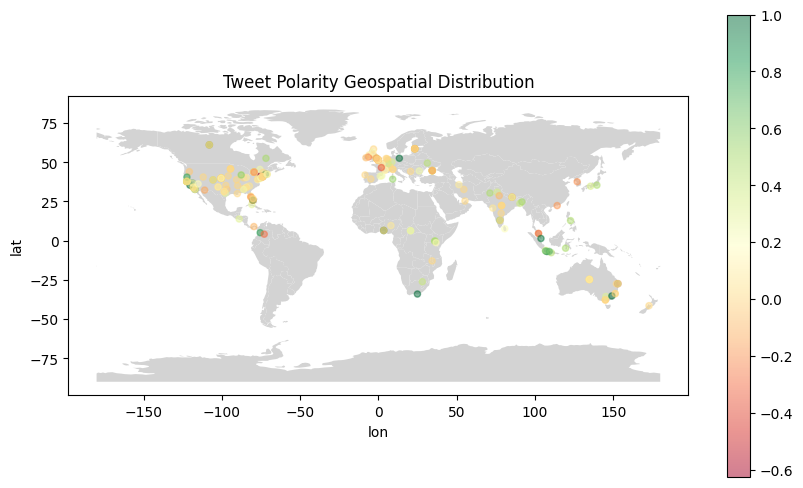

In [47]:
# Polarity Plot
## Plotting the Geospatial Distribution of Tweet Polarity
fig, ax = plt.subplots(figsize=(10, 6))

# Reading the world map using GeoPandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plotting the world map in light grey
world.plot(ax=ax, color='lightgrey')

# Scatter plot of valid_geo_tweets with longitude on x-axis, latitude on y-axis, and color-coded by tweet polarity
valid_geo_tweets.plot(kind='scatter', x='lon', y='lat',
                     c=valid_geo_tweets['polarity'], cmap='RdYlGn',
                     colorbar=True, alpha=0.5, ax=ax)
# Setting plot title
ax.set_title('Tweet Polarity Geospatial Distribution')

# Displaying the plot
plt.show()

In [48]:
'''
This visualization helps in understanding the geographical distribution of tweet sentiment polarity,
 with regions in red indicating more negative sentiments, and those in green indicating more positive sentiments.

SyntaxError: ignored

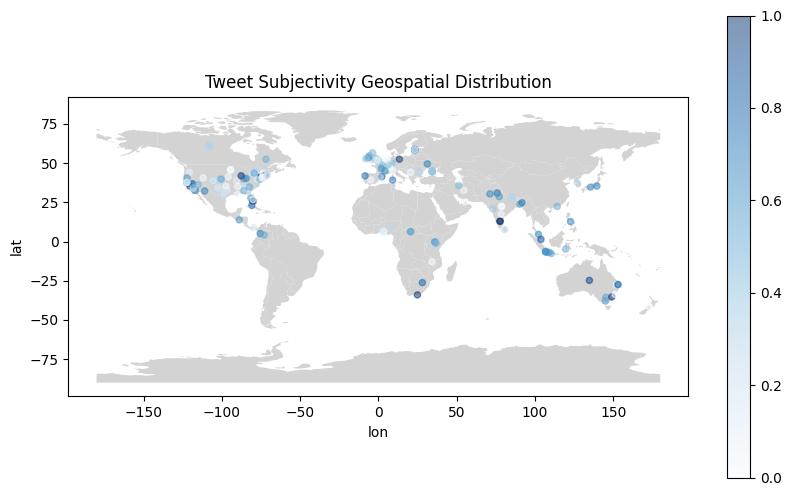

In [52]:
# Subjectivity Plot
# Plotting the Geospatial Distribution of Tweet Subjectivity
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting the world map in light grey
world.plot(ax=ax, color='lightgrey')
# Scatter plot of valid_geo_tweets with longitude on x-axis, latitude on y-axis, and color-coded by tweet subjectivity
valid_geo_tweets.plot(kind='scatter', x='lon', y='lat',
                     c=valid_geo_tweets['subjectivity'], cmap='Blues',
                     colorbar=True, alpha=0.5, ax=ax)
# Setting plot title
ax.set_title('Tweet Subjectivity Geospatial Distribution')

# Displaying the plot
plt.show()

In [ ]:
'''
The plot provides a spatial representation of tweet subjectivity,
showcasing how subjective or objective tweets are across different geographical locations.
Darker shades of blue indicate higher levels of subjectivity, while lighter shades suggest lower subjectivity.
Regions with more intense colors have tweets that tend to express opinions or emotions more strongly,
whereas lighter regions may have more factual or neutral tweets.
Analyzing subjectivity geospatially can offer insights into the emotional or opinionated nature of tweets from different areas of the world.

'''

# Task 2.5
As a policy advisor advising the UK government on worldwide popular attitude toward cryptocurrencies, our geographical Twitter research shows a complicated patchwork of viewpoints without a clear winner.

Positive and negative attitudes are mild in North America. Most unfavorable attitudes come from the East Coast and Great Lakes area of the US and Canada, where conventional banking hubs may be more resistant to digital asset disruption. West Coast attitude is moderately positive, notably in California and British Columbia, where tech hubs draw bitcoin proponents. While New York and Chicago are negative due to crypto mistrust, the Midwest is mostly neutral.  

Europe too has intermittent mild optimism and negativity with no geographical tendencies. As Europe's economy is diversified, this emotion mosaic reflects differing outlooks across countries, cultures, and languages. Given London's dual reputation as a global banking capital and developing fintech epicenter, England, Wales, Scotland, and Northern Ireland show no polarity trend.  

South America has few bitcoin data points but is optimistic. Positive energy is concentrated in crypto adoption leaders like Brazil, Argentina, and Chile, where digital assets are gaining public awareness and incorporation into monetary systems.

Africa and the Middle East contain minimal neutral data, suggesting cryptocurrencies have not yet entered mainstream popular conversation or knowledge. This reflects the early stage of crypto growth in Africa and the Middle East, with few landmark adoption milestones to attract investment or policy attention.   

Asian data is abundant but lacks geographic polarity. Negative sentiment in India may be due to crypto mistrust and regulatory ambiguity. In contrast, favorable hotspots appear in established cryptocurrency and financial hubs like Japan, South Korea, Singapore, Hong Kong, and Taiwan. Thus, Asia's historic financial hubs more open to crypto innovation and developing nations still assessing risks and advantages despite pervasive fraud have conflicting views.  

Tweet subjectivity shows that most global feelings are somewhat to highly personal opinion and perspective. This subjectivity and the lack of a clear united polarity requirement indicate that public opinions and outlooks on cryptocurrencies are still evolving, with no mature consensus for or against mainstream incorporation.

In conclusion, the geographical pattern of mixed polarity and high subjectivity demonstrates cryptocurrency attitudes are split worldwide without a clear pro/con crypto adoption mandate. Our study implies that heated public conversation should be allowed more time to crystallize and develop before the UK considers unduly definite legislation in either direction. As popular emotions and social awareness evolve unevenly among areas, moderate policy postures that accommodate public learning and discussion may be ideal for now. The UK may lead with moderation, embracing the technology's hazards and benefits but opposing reactive regulations that could hinder its digitalization involvement.